In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno


import warnings
warnings.filterwarnings("ignore")

In [3]:
df_temperature = pd.read_csv("temperature.csv")
df_CO2 =pd.read_csv("carbon_emmission.csv")

#df_temperature.shape
#df_CO2.shape
#df_temperature.info()
#df_CO2.info()
df_CO2.head(5)

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [4]:
df_CO2.describe()
#df_temperature.describe()

,ObjectId,Value
count,1570.000000,1570.000000
mean,785.500000,180.716153
std,453.364276,180.554706
min,1.000000,-0.100000
25%,393.250000,0.450000
50%,785.500000,313.835000
75%,1177.750000,355.072500
max,1570.000000,424.000000


In [55]:
#Transformer le dataframe de temperature de format large en format long
df_temperature_long= df_temperature.melt(id_vars=["ObjectId","Country","ISO2","ISO3"],
                                         var_name="Years",
                                         value_name="temperatures")

df_temperature_long ["Years"]= df_temperature_long["Years"].str.replace('F', '').astype(int)

#transformer la colonne year dans emission CO2
df_CO2["Years"]=df_CO2["Date"].str[:4].astype(int)
df_CO2["Mounth"] = df_CO2["Date"].str[-2:].astype(int)
 

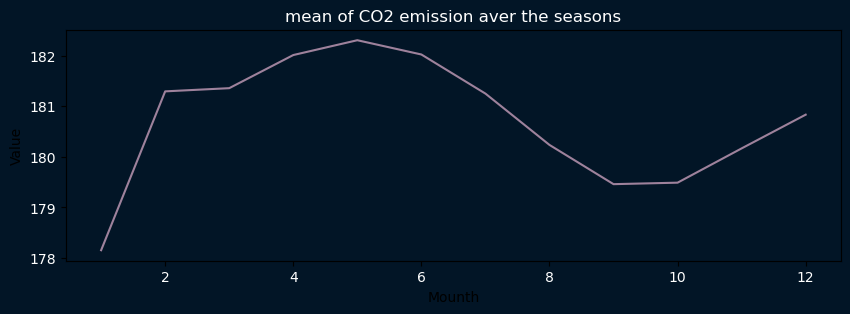

In [60]:
dataCO2mounth= df_CO2.groupby("Mounth")["Value"].mean().reset_index()
plt.figure(figsize=(10,3),facecolor="#021526")
sns.lineplot(data=dataCO2mounth,
             x="Mounth", y="Value",
             color="#9E829C")
plt.title("mean of CO2 emission aver the seasons", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

The above graph highlights the seasonal fluctuations in CO₂ concentrations, which peak during late spring and early summer (around May) and reach the lowest levels in fall (around September). These variations are likely due to natural processes such as plant photosynthesis, which absorbs CO₂ during the growing season, and respiration, which releases CO₂ in the off-season. This seasonal cycle underscores the role of natural carbon sinks in moderating atmospheric CO₂ levels.

Index(['Years', 'temperatures'], dtype='object')


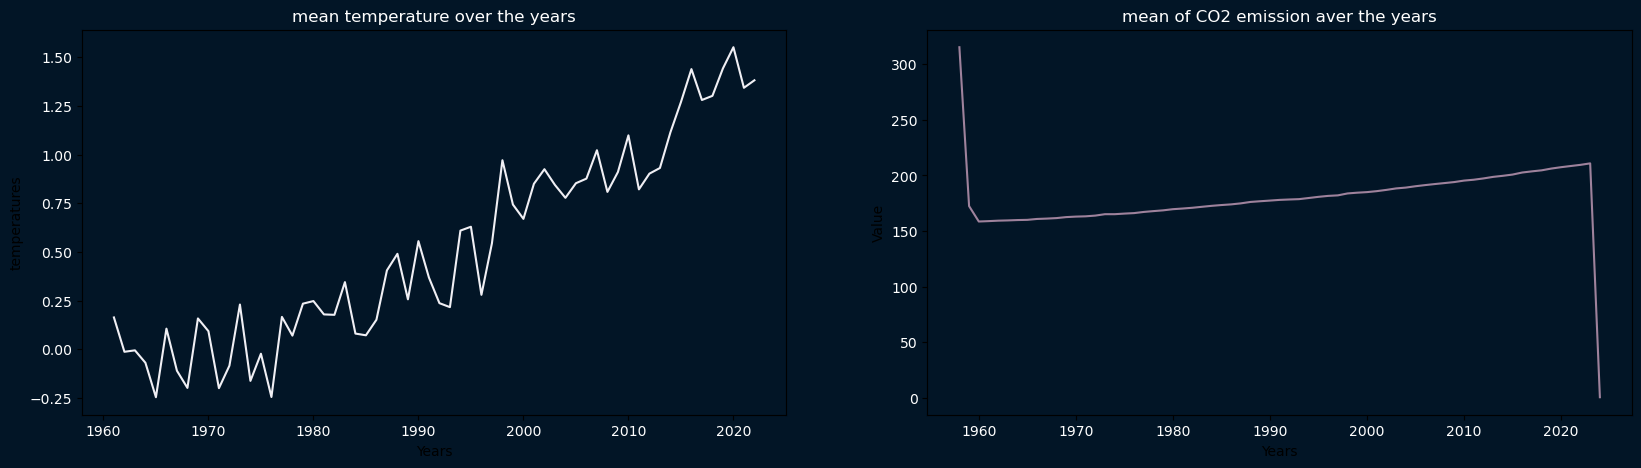

In [6]:
#visualisation des température et emission de co2 par année
data=df_temperature_long.groupby('Years')["temperatures"].mean().reset_index()
dataCO2= df_CO2.groupby("Years")["Value"].mean().reset_index()
print(data.columns)
plt.figure(figsize=(20,5),facecolor="#021526")
plt.subplot(1,2,1)
sns.lineplot(data=data,
             x="Years", y="temperatures",
             color="#F0EFF4")
plt.title("mean temperature over the years",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
sns.lineplot(data=dataCO2,
             x="Years", y="Value",
             color="#9E829C")
plt.title("mean of CO2 emission aver the years", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.show()

In [7]:
df_temperature_long["temperatures"]=df_temperature_long["temperatures"].fillna(df_temperature_long["temperatures"].median())

df_temperature_long["ISO2"]= df_temperature_long["ISO2"].fillna(df_temperature_long["ISO2"].mode())




In [ ]:
#calcule de la correlation
#fusionner les deux dataframe
df_merged= pd.merge(data,dataCO2,on="Years")
df_merged.head(10)

corr = df_merged[["temperatures","Value"]].corr()

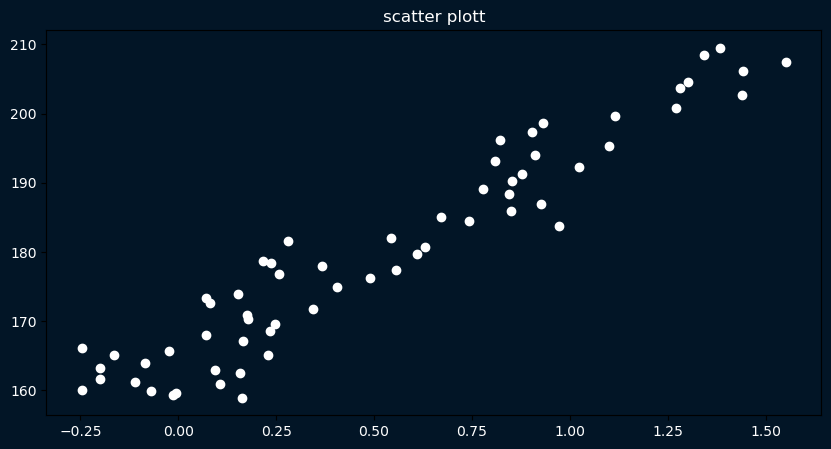

In [54]:
#visualisation d'un nuage de point
plt.figure(figsize=(10,5),facecolor="#021526")
plt.scatter(df_merged["temperatures"],df_merged["Value"],color="white",alpha=1)
plt.title("scatter plott",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

The scatter plot shows a clear linear trend, where higher CO₂ concentrations correspond to greater temperature changes. This visual evidence underscores the direct relationship between CO₂ emissions and global warming, which provides further support for policies targeting reductions in carbon emissions to combat climate impacts.

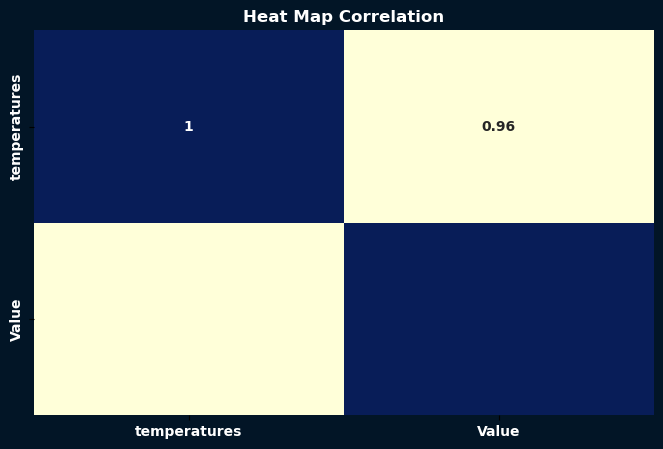

In [48]:
#heat map 
plt.figure(figsize=(8,5),facecolor= "#021526")
sns.heatmap(corr,
            annot=True, 
            cmap="YlGnBu",
            cbar=False,
            annot_kws={"fontweight" : "bold"})
plt.title("Heat Map Correlation",color="white",fontweight="bold")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")



The heatmap reveals a strong positive correlation (0.96) between CO₂ concentrations and temperature changes. This statistical relationship reinforces the observation that higher CO₂ levels are closely linked with increasing global temperatures, which highlights the importance of addressing carbon emissions to mitigate climate change.

In [ ]:
#le coefficient de corrélation de Pearson et p value
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_merged["Value"], df_merged["temperatures"])
print(f"Corrélation de Pearson : {correlation:.3f}, p-value : {p_value:.3f}")


p value < 0,05 : The correlation is statistically significant (we reject the null hypothesis).

The scatter plot shows a trend, but a linear regression allows us to quantify how temperature changes as a function of CO₂.

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression  #pour créer et entraîner le modèle de régression.
from sklearn.metrics import r2_score  #pour évaluer la qualité du modèle.

#Rendre les valeurs en 2D pour lui il a plus qu"'une seule variable
X= df_merged[["Value"]]
Y=df_merged[["temperatures"]]

#model 
model= LinearRegression() #initiation du madel
model.fit(X,Y) #entrainement du model

#parametre de regression (a et b )
a = model.coef_[0]  #pente de la droite de regression le 0 c'est en cas de plusieurs variables
b= model.intercept_ #oordonnée à l'origine

print("Y = ", a,"X + ", b)

#prediction
temperature_predict= model.predict(X)

#calcul des résidue
R = r2_score(Y,temperature_predict)
print(f"R² Score: {R:.4f}")


Y =  [0.03184274] X +  [-5.21986199]
R² Score: 0.9128


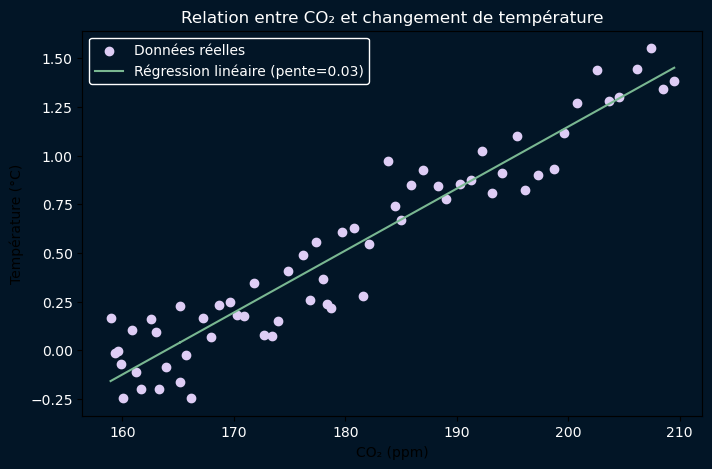

In [ ]:
plt.figure(figsize=(8, 5),facecolor="#021526")
plt.scatter(df_merged["Value"], df_merged["temperatures"], label="Données réelles",color="#DECDF5")  # Nuage de points
plt.plot(df_merged["Value"], temperature_predict, color="#79B791", label=f"Régression linéaire (pente={a[0]:.2f})")
plt.xlabel("CO₂ (ppm)")
plt.ylabel("Température (°C)")
plt.legend()
plt.title("Relation entre CO₂ et changement de température", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.legend(fontsize=10,
           facecolor="#021526",
           edgecolor="white",
           labelcolor="white",
           framealpha=1,
           )

plt.show()


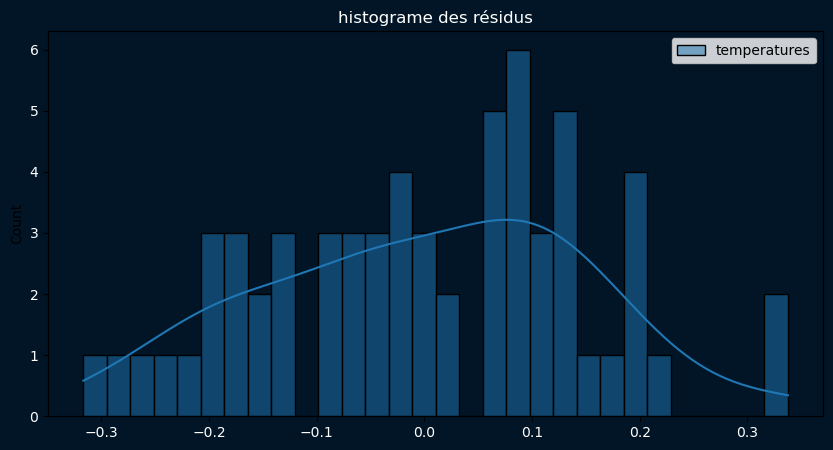

In [ ]:
#résidu 

residuals = Y-temperature_predict

plt.figure(figsize=(10,5),facecolor="#021526")
sns.histplot(residuals, bins=30, kde=True)  #kde = courb ed densité
plt.title("histograme des résidus",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()



In [96]:
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {p_value}")


Shapiro-Wilk test: p-value = 0.49432727694511414


En statistique, on teste l'hypothèse nulle (H₀) : "Les résidus suivent une distribution normale".

Si p-value > 0,05, on ne rejette pas H₀ → Les résidus peuvent être considérés comme normalement distribués.

Ici, avec p = 0,49, il n'y a pas de preuve que les résidus ne sont pas normaux.

In [103]:
#tester la stationnarité
from statsmodels.tsa.stattools import adfuller

# Tester la stationnarité des émissions de CO2
result_co2 = adfuller(df_merged["Value"])
print("Test ADF pour CO2:", result_co2[1])  # p-value

# Tester la stationnarité des températures
result_temp = adfuller(df_merged["temperatures"])
print("Test ADF pour Température:", result_temp[1])  # p-value

data_merged_diff = df_merged.diff().dropna() #differentiation


Test ADF pour CO2: 1.0
Test ADF pour Température: 0.9912747994675674


In [104]:
#teste de causalité 
from statsmodels.tsa.stattools import grangercausalitytests

#définition des variables pour le test
df_causalité=data_merged_diff[["temperatures","Value"]]

grangercausalitytests(df_causalité, maxlag=3, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3160  , p=0.0739  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=3.4906  , p=0.0617  , df=1
likelihood ratio test: chi2=3.3928  , p=0.0655  , df=1
parameter F test:         F=3.3160  , p=0.0739  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3592  , p=0.6999  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=0.7848  , p=0.6754  , df=2
likelihood ratio test: chi2=0.7796  , p=0.6772  , df=2
parameter F test:         F=0.3592  , p=0.6999  , df_denom=54, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0755  , p=0.3678  , df_denom=51, df_num=3
ssr based chi2 test:   chi2=3.6695  , p=0.2994  , df=3
likelihood ratio test: chi2=3.5581  , p=0.3133  , df=3
parameter F test:         F=1.0755  , p=0.3678  , df_denom=51, df_num=3


{1: ({'ssr_ftest': (3.3160399767924997, 0.07385687345425217, 57.0, 1),
   'ssr_chi2test': (3.490568396623684, 0.06171939026911919, 1),
   'lrtest': (3.3928082074778843, 0.06548133596441778, 1),
   'params_ftest': (3.316039976792509, 0.07385687345425185, 57.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.35915062129766023, 0.6999244302356534, 54.0, 2),
   'ssr_chi2test': (0.784810616909702, 0.6754303008633902, 2),
   'lrtest': (0.7796367217699469, 0.6771798656793377, 2),
   'params_ftest': (0.3591506212976603, 0.6999244302356534, 54.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0755468005048283, 0.36776166268726185, 51.0, 3),
   'ssr_chi2test': (3.6695126134870613, 0.2994331794193531, 3),
   'lrtest': (3.558107166696715, 0.3133036458710178, 3),
   'params_ftest': (1.075546800504828, 0.36776166268726185, 51.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 